In [1]:
import kagglehub
from matplotlib.pyplot import ylabel

# Download latest version
path = kagglehub.dataset_download("tunguz/us-elections-dataset")

print("Path to dataset files:", path)

100%|██████████| 133k/133k [00:00<00:00, 1.12MB/s]

Extracting files...
Path to dataset files: /Users/hendwi1/.cache/kagglehub/datasets/tunguz/us-elections-dataset/versions/10


# Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
from statsmodels.graphics.api import plot_corr
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# EDA and Ingress

In [43]:
full_df = pl.read_csv('10/1976-2020-president.csv', null_values=['blank','NA'])

full_df.describe()


shape: (9, 16)
┌────────────┬─────────────┬─────────┬──────────┬───┬────────────┬────────────┬───────┬────────────┐
│ statistic  ┆ year        ┆ state   ┆ state_po ┆ … ┆ totalvotes ┆ version    ┆ notes ┆ party_simp │
│ ---        ┆ ---         ┆ ---     ┆ ---      ┆   ┆ ---        ┆ ---        ┆ ---   ┆ lified     │
│ str        ┆ f64         ┆ str     ┆ str      ┆   ┆ f64        ┆ f64        ┆ str   ┆ ---        │
│            ┆             ┆         ┆          ┆   ┆            ┆            ┆       ┆ str        │
╞════════════╪═════════════╪═════════╪══════════╪═══╪════════════╪════════════╪═══════╪════════════╡
│ count      ┆ 4287.0      ┆ 4287    ┆ 4287     ┆ … ┆ 4287.0     ┆ 4287.0     ┆ 0     ┆ 4287       │
│ null_count ┆ 0.0         ┆ 0       ┆ 0        ┆ … ┆ 0.0        ┆ 0.0        ┆ 4287  ┆ 0          │
│ mean       ┆ 1999.080942 ┆ null    ┆ null     ┆ … ┆ 2.3669e6   ┆ 2.0210113e ┆ null  ┆ null       │
│            ┆             ┆         ┆          ┆   ┆            ┆ 7          ┆       ┆            │
│ std        ┆ 14.220014   ┆ null    ┆ null     ┆ … ┆ 2.4650e6   ┆ 0.0        ┆ null  ┆ null       │
│ min        ┆ 1976.0      ┆ ALABAMA ┆ AK       ┆ … ┆ 123574.0   ┆ 2.0210113e ┆ null  ┆ DEMOCRAT   │
│            ┆             ┆         ┆          ┆   ┆            ┆ 7          ┆       ┆            │
│ 25%        ┆ 1988.0      ┆ null    ┆ null     ┆ … ┆ 652274.0   ┆ 2.0210113e ┆ null  ┆ null       │
│            ┆             ┆         ┆          ┆   ┆            ┆ 7          ┆       ┆            │
│ 50%        ┆ 2000.0      ┆ null    ┆ null     ┆ … ┆ 1.56918e6  ┆ 2.0210113e ┆ null  ┆ null       │
│            ┆             ┆         ┆          ┆   ┆            ┆ 7          ┆       ┆            │
│ 75%        ┆ 2012.0      ┆ null    ┆ null     ┆ … ┆ 3.033118e6 ┆ 2.0210113e ┆ null  ┆ null       │
│            ┆             ┆         ┆          ┆   ┆            ┆ 7          ┆       ┆            │
│ max        ┆ 2020.0      ┆ WYOMING ┆ WY       ┆ … ┆ 1.7500881e ┆ 2.0210113e ┆ null  ┆ REPUBLICAN │
│            ┆             ┆         ┆          ┆   ┆ 7          ┆ 7          ┆       ┆            │
└────────────┴─────────────┴─────────┴──────────┴───┴────────────┴────────────┴───────┴────────────┘

In [49]:
states = full_df.select(
    pl.col('state').unique()   
).to_series().to_list()
parties = full_df.select(
    pl.col('party_simplified').unique()
).to_series().to_list()

print(states)
print(parties)

['NEBRASKA', 'SOUTH DAKOTA', 'UTAH', 'VIRGINIA', 'RHODE ISLAND', 'INDIANA', 'IOWA', 'GEORGIA', 'DELAWARE', 'MASSACHUSETTS', 'KANSAS', 'MICHIGAN', 'MAINE', 'NORTH CAROLINA', 'KENTUCKY', 'WASHINGTON', 'VERMONT', 'CALIFORNIA', 'TENNESSEE', 'NORTH DAKOTA', 'NEW HAMPSHIRE', 'FLORIDA', 'MINNESOTA', 'ALABAMA', 'HAWAII', 'MONTANA', 'ARIZONA', 'ALASKA', 'OHIO', 'MARYLAND', 'SOUTH CAROLINA', 'DISTRICT OF COLUMBIA', 'WYOMING', 'LOUISIANA', 'NEW YORK', 'NEW MEXICO', 'PENNSYLVANIA', 'TEXAS', 'CONNECTICUT', 'COLORADO', 'IDAHO', 'WEST VIRGINIA', 'MISSISSIPPI', 'ARKANSAS', 'NEVADA', 'OKLAHOMA', 'NEW JERSEY', 'WISCONSIN', 'OREGON', 'ILLINOIS', 'MISSOURI']
['OTHER', 'DEMOCRAT', 'LIBERTARIAN', 'REPUBLICAN']


In [53]:
df = full_df.group_by(['state','year','party_simplified']).agg(
    pl.sum('candidatevotes').alias('total_candidate_votes'),
    pl.first('totalvotes')
)

df.filter(
    pl.col('state').str.contains('ALABAMA'),
    pl.col('year').eq(2000)
)                                    

shape: (4, 5)
┌─────────┬──────┬──────────────────┬───────────────────────┬────────────┐
│ state   ┆ year ┆ party_simplified ┆ total_candidate_votes ┆ totalvotes │
│ ---     ┆ ---  ┆ ---              ┆ ---                   ┆ ---        │
│ str     ┆ i64  ┆ str              ┆ i64                   ┆ i64        │
╞═════════╪══════╪══════════════════╪═══════════════════════╪════════════╡
│ ALABAMA ┆ 2000 ┆ OTHER            ┆ 26595                 ┆ 1666272    │
│ ALABAMA ┆ 2000 ┆ LIBERTARIAN      ┆ 5893                  ┆ 1666272    │
│ ALABAMA ┆ 2000 ┆ REPUBLICAN       ┆ 941173                ┆ 1666272    │
│ ALABAMA ┆ 2000 ┆ DEMOCRAT         ┆ 692611                ┆ 1666272    │
└─────────┴──────┴──────────────────┴───────────────────────┴────────────┘

In [98]:
results = (df.select(
    pl.col('year'),
    pl.col('state'),
    pl.col('party_simplified').alias('party'),
    pl.col('total_candidate_votes').alias('votes'),
    pl.col('totalvotes').alias('votes_total')
)
           .sort(['state','year','party'], descending=[False,False,False])
           .filter(pl.col('party').is_in(['REPUBLICAN','DEMOCRAT']))
           .with_columns((pl.col('votes')/pl.col('votes_total')).round(2).alias('percentage'))
           )

results

shape: (1_224, 6)
┌──────┬─────────┬────────────┬────────┬─────────────┬────────────┐
│ year ┆ state   ┆ party      ┆ votes  ┆ votes_total ┆ percentage │
│ ---  ┆ ---     ┆ ---        ┆ ---    ┆ ---         ┆ ---        │
│ i64  ┆ str     ┆ str        ┆ i64    ┆ i64         ┆ f64        │
╞══════╪═════════╪════════════╪════════╪═════════════╪════════════╡
│ 1976 ┆ ALABAMA ┆ DEMOCRAT   ┆ 659170 ┆ 1182850     ┆ 0.56       │
│ 1976 ┆ ALABAMA ┆ REPUBLICAN ┆ 504070 ┆ 1182850     ┆ 0.43       │
│ 1980 ┆ ALABAMA ┆ DEMOCRAT   ┆ 636730 ┆ 1341929     ┆ 0.47       │
│ 1980 ┆ ALABAMA ┆ REPUBLICAN ┆ 654192 ┆ 1341929     ┆ 0.49       │
│ 1984 ┆ ALABAMA ┆ DEMOCRAT   ┆ 551899 ┆ 1441713     ┆ 0.38       │
│ …    ┆ …       ┆ …          ┆ …      ┆ …           ┆ …          │
│ 2012 ┆ WYOMING ┆ REPUBLICAN ┆ 170962 ┆ 250701      ┆ 0.68       │
│ 2016 ┆ WYOMING ┆ DEMOCRAT   ┆ 55973  ┆ 258788      ┆ 0.22       │
│ 2016 ┆ WYOMING ┆ REPUBLICAN ┆ 174419 ┆ 258788      ┆ 0.67       │
│ 2020 ┆ WYOMING ┆ DEMOCRAT   ┆ 73491  ┆ 278503      ┆ 0.26       │
│ 2020 ┆ WYOMING ┆ REPUBLICAN ┆ 193559 ┆ 278503      ┆ 0.69       │
└──────┴─────────┴────────────┴────────┴─────────────┴────────────┘

<Axes: xlabel='year', ylabel='votes'>

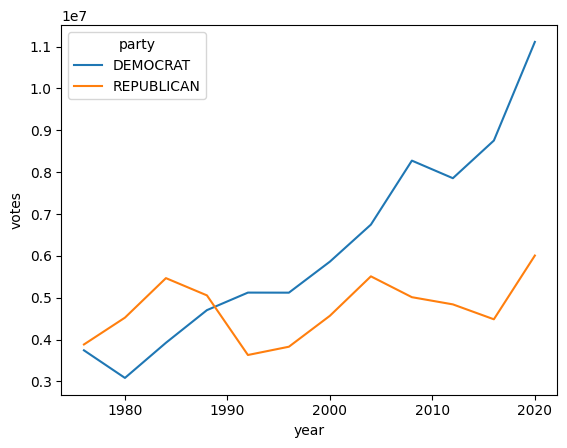

In [99]:
sns.lineplot(
    data = results.filter(pl.col('state').str.contains('CALIFORNIA')),
    x = 'year',
    y = 'votes',
    hue = 'party'
)

In [100]:
by_state = results.partition_by("state")

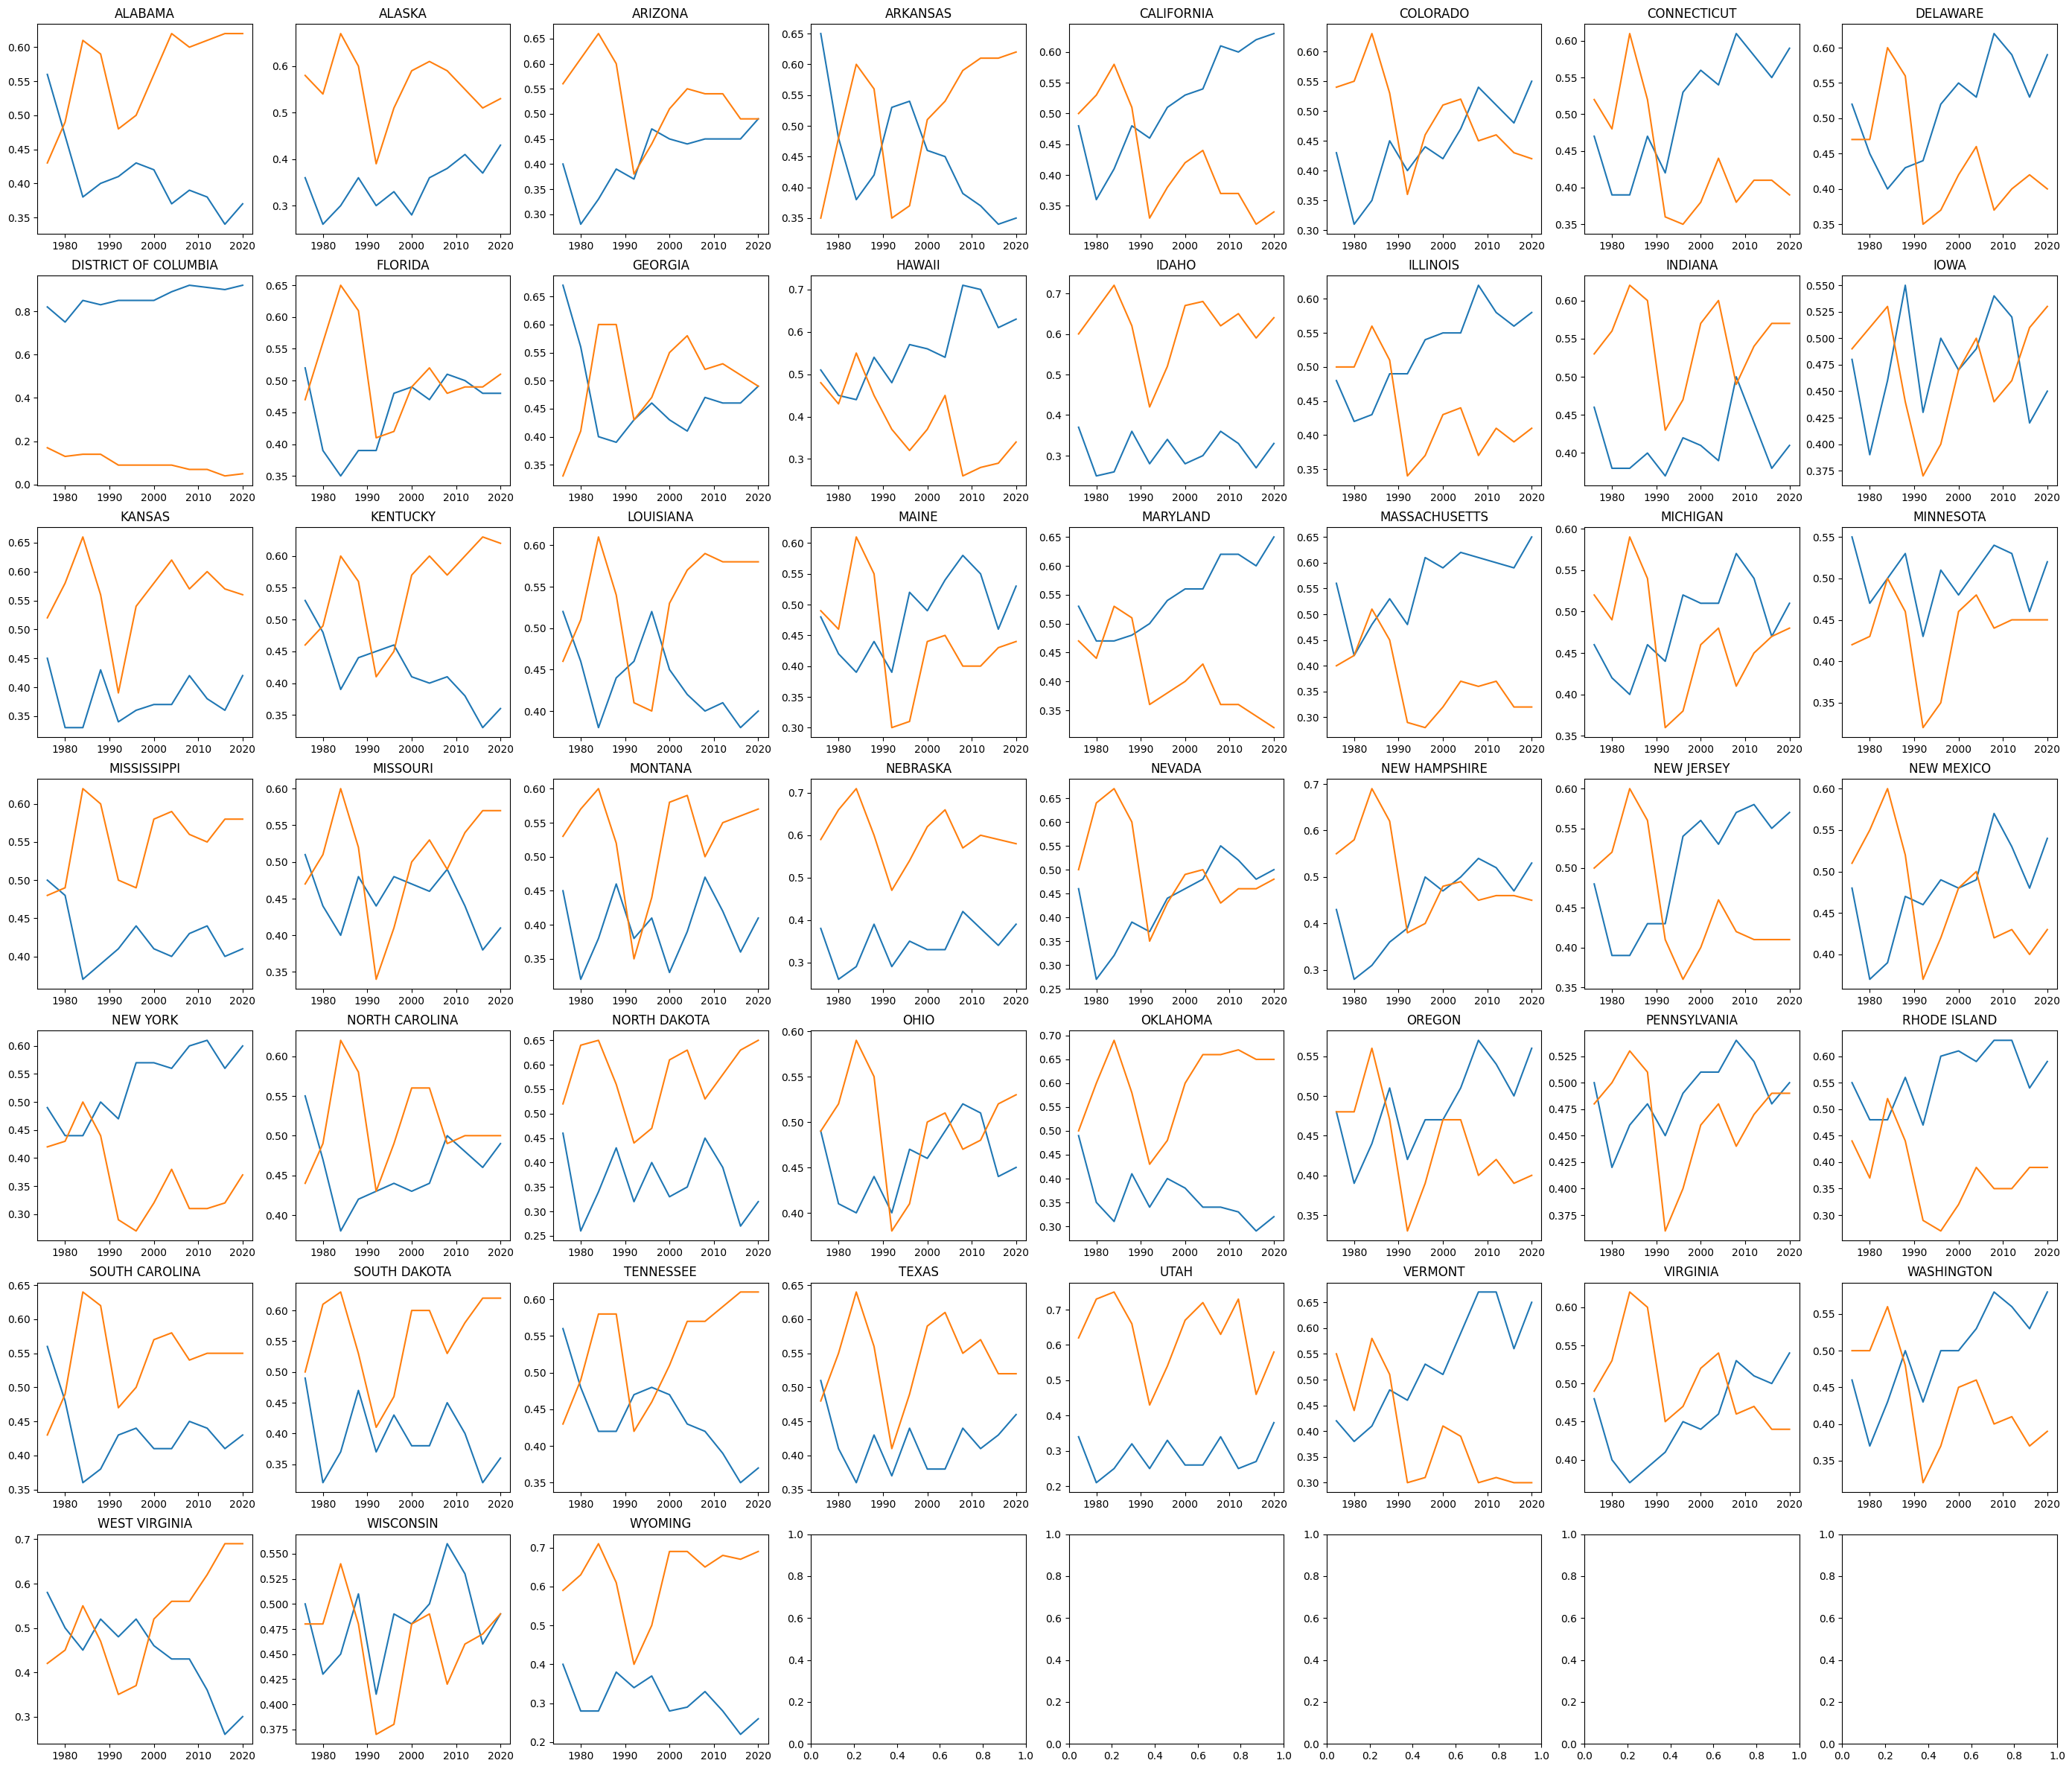

In [107]:
fig, ax = plt.subplots(7,8, figsize=(35,30))
ax = ax.flatten()
for i,st in enumerate(by_state):
    sns.lineplot(st, x='year',y='percentage',hue='party',ax=ax[i], legend=False)
    state = st.select('state').to_series().unique().to_list()[0]
    ax[i].set_title(state)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

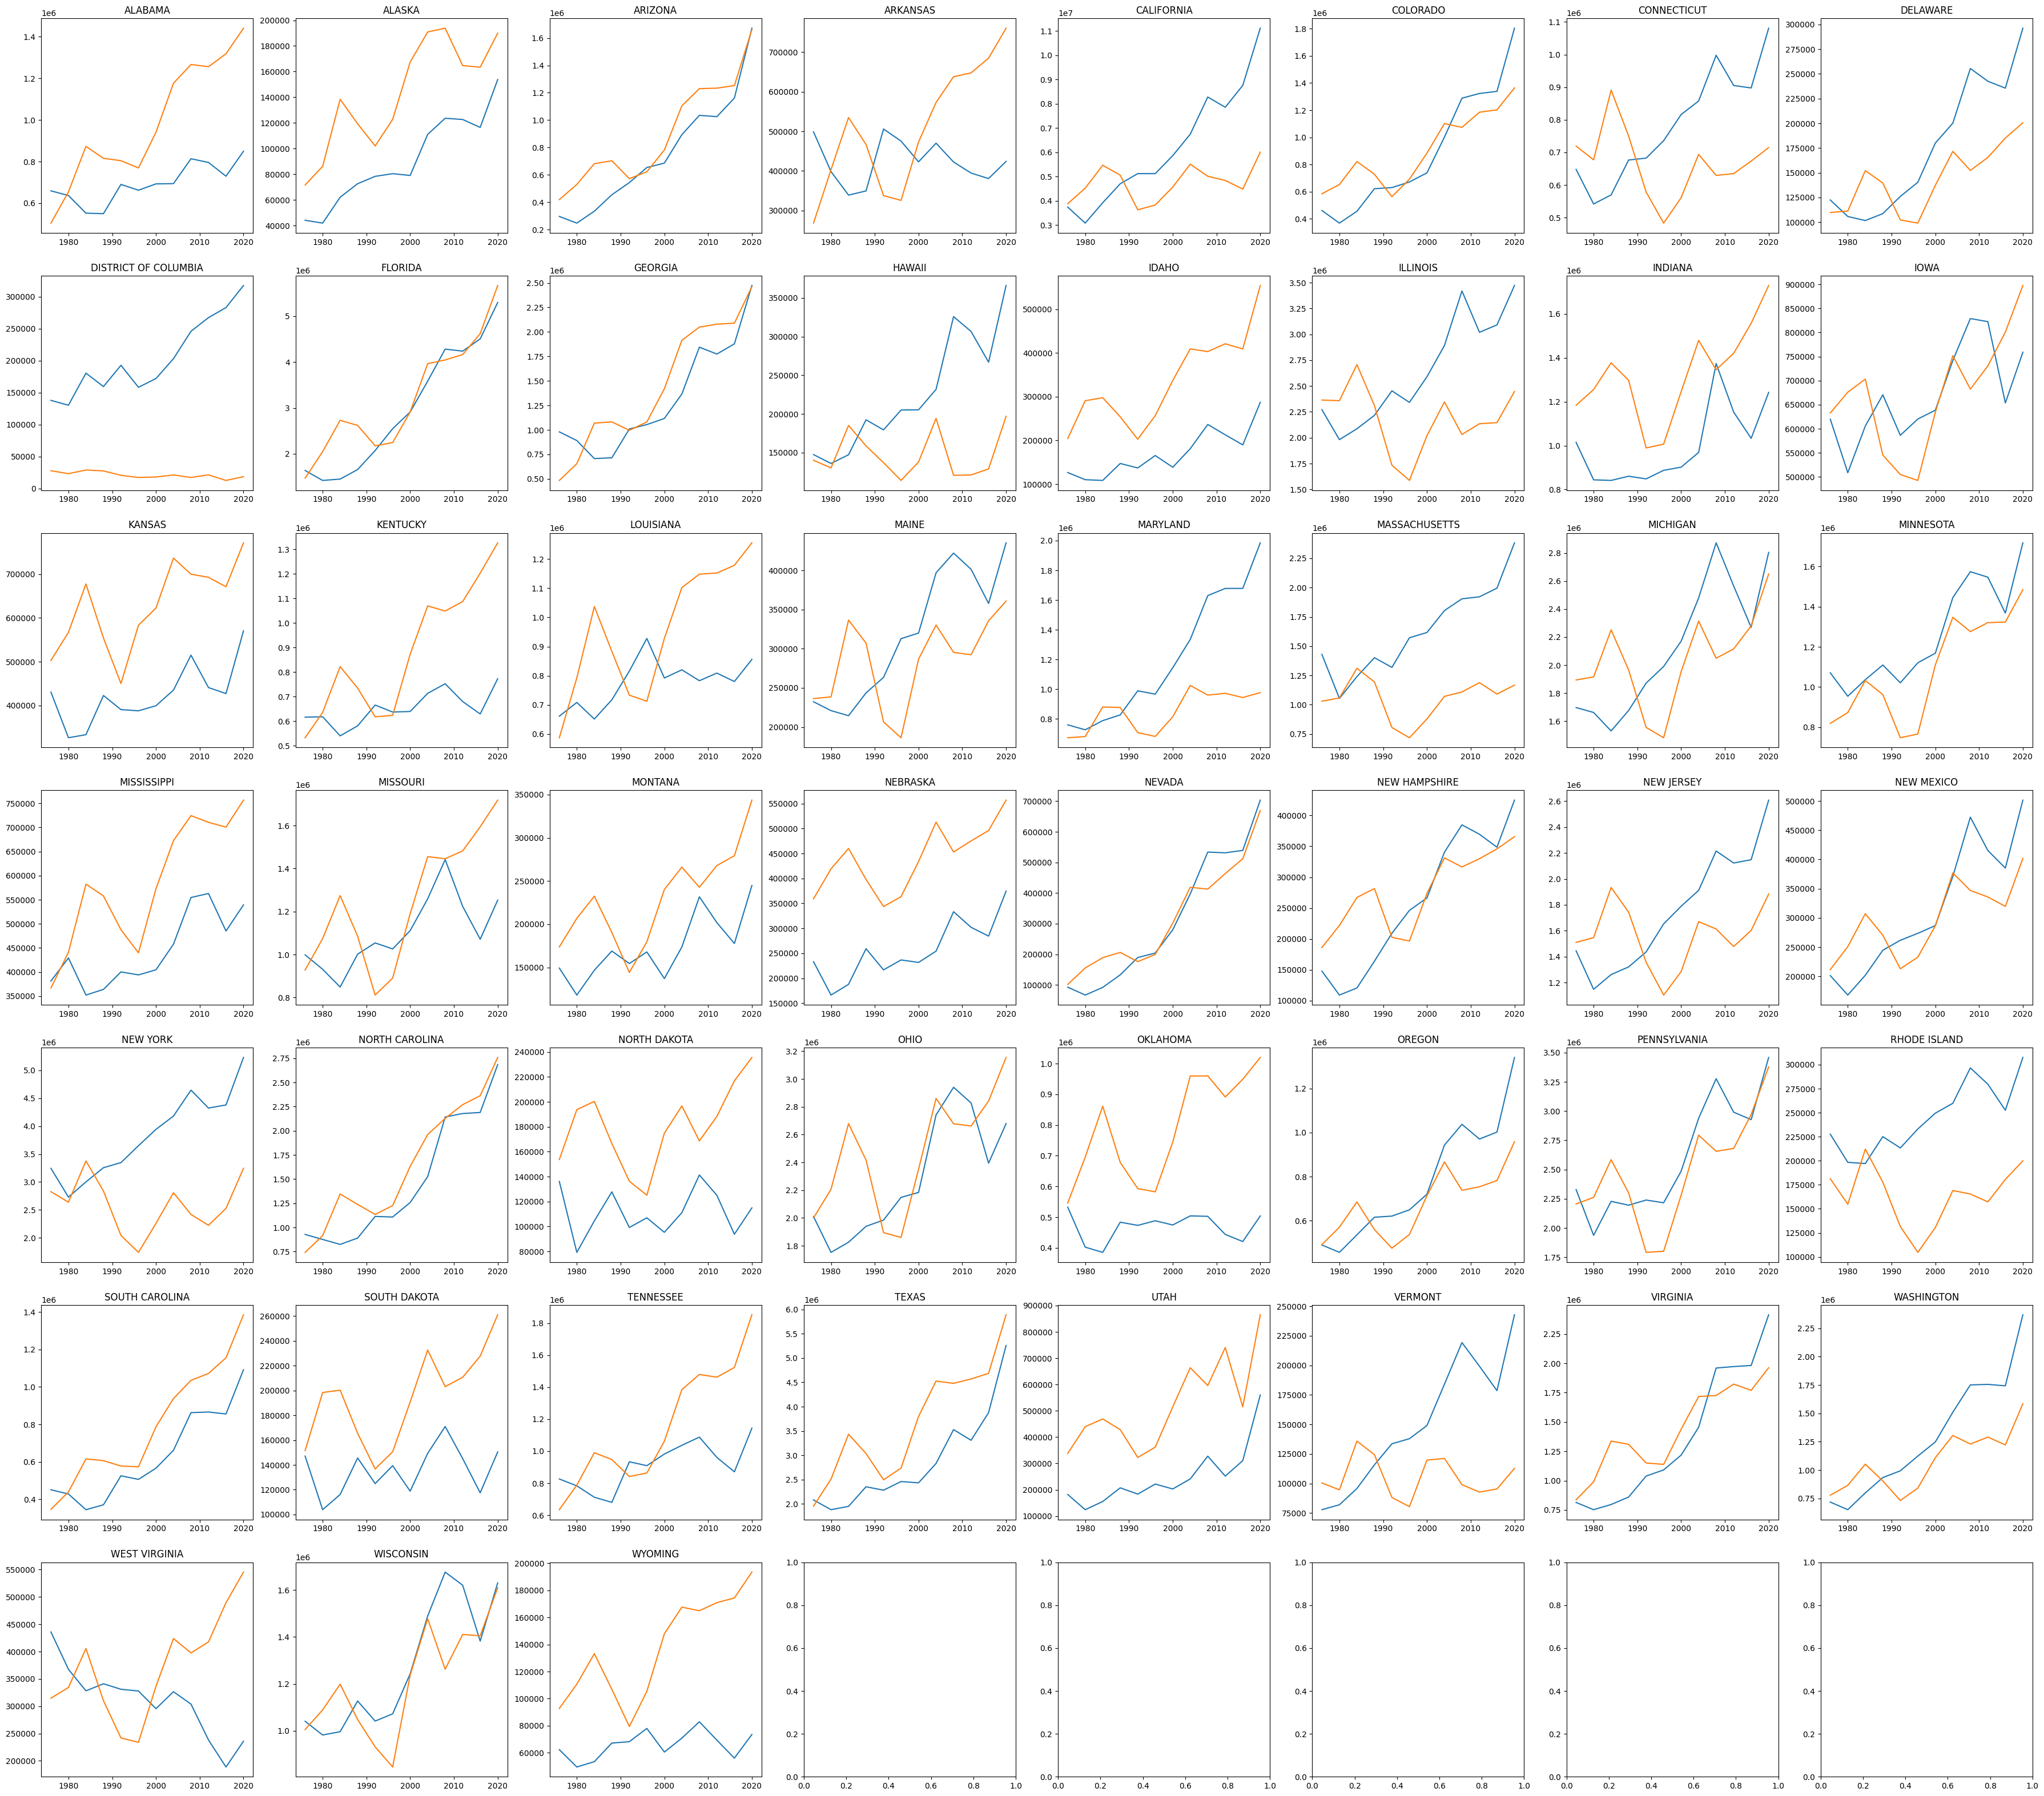

In [109]:
fig, ax = plt.subplots(7,8, figsize=(45,40))
ax = ax.flatten()
for i,st in enumerate(by_state):
    sns.lineplot(st, x='year',y='votes',hue='party',ax=ax[i], legend=False)
    state = st.select('state').to_series().unique().to_list()[0]
    ax[i].set_title(state)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

In [119]:
rep = results.filter(pl.col('party').str.contains('REP')).select(
    pl.col('year'),
    pl.col('state'),
    pl.col('votes'),
    pl.col('percentage')
)

dem = results.filter(pl.col('party').str.contains('DEM')).select(
    pl.col('year'),
    pl.col('state'),
    pl.col('votes'),
    pl.col('percentage')
)


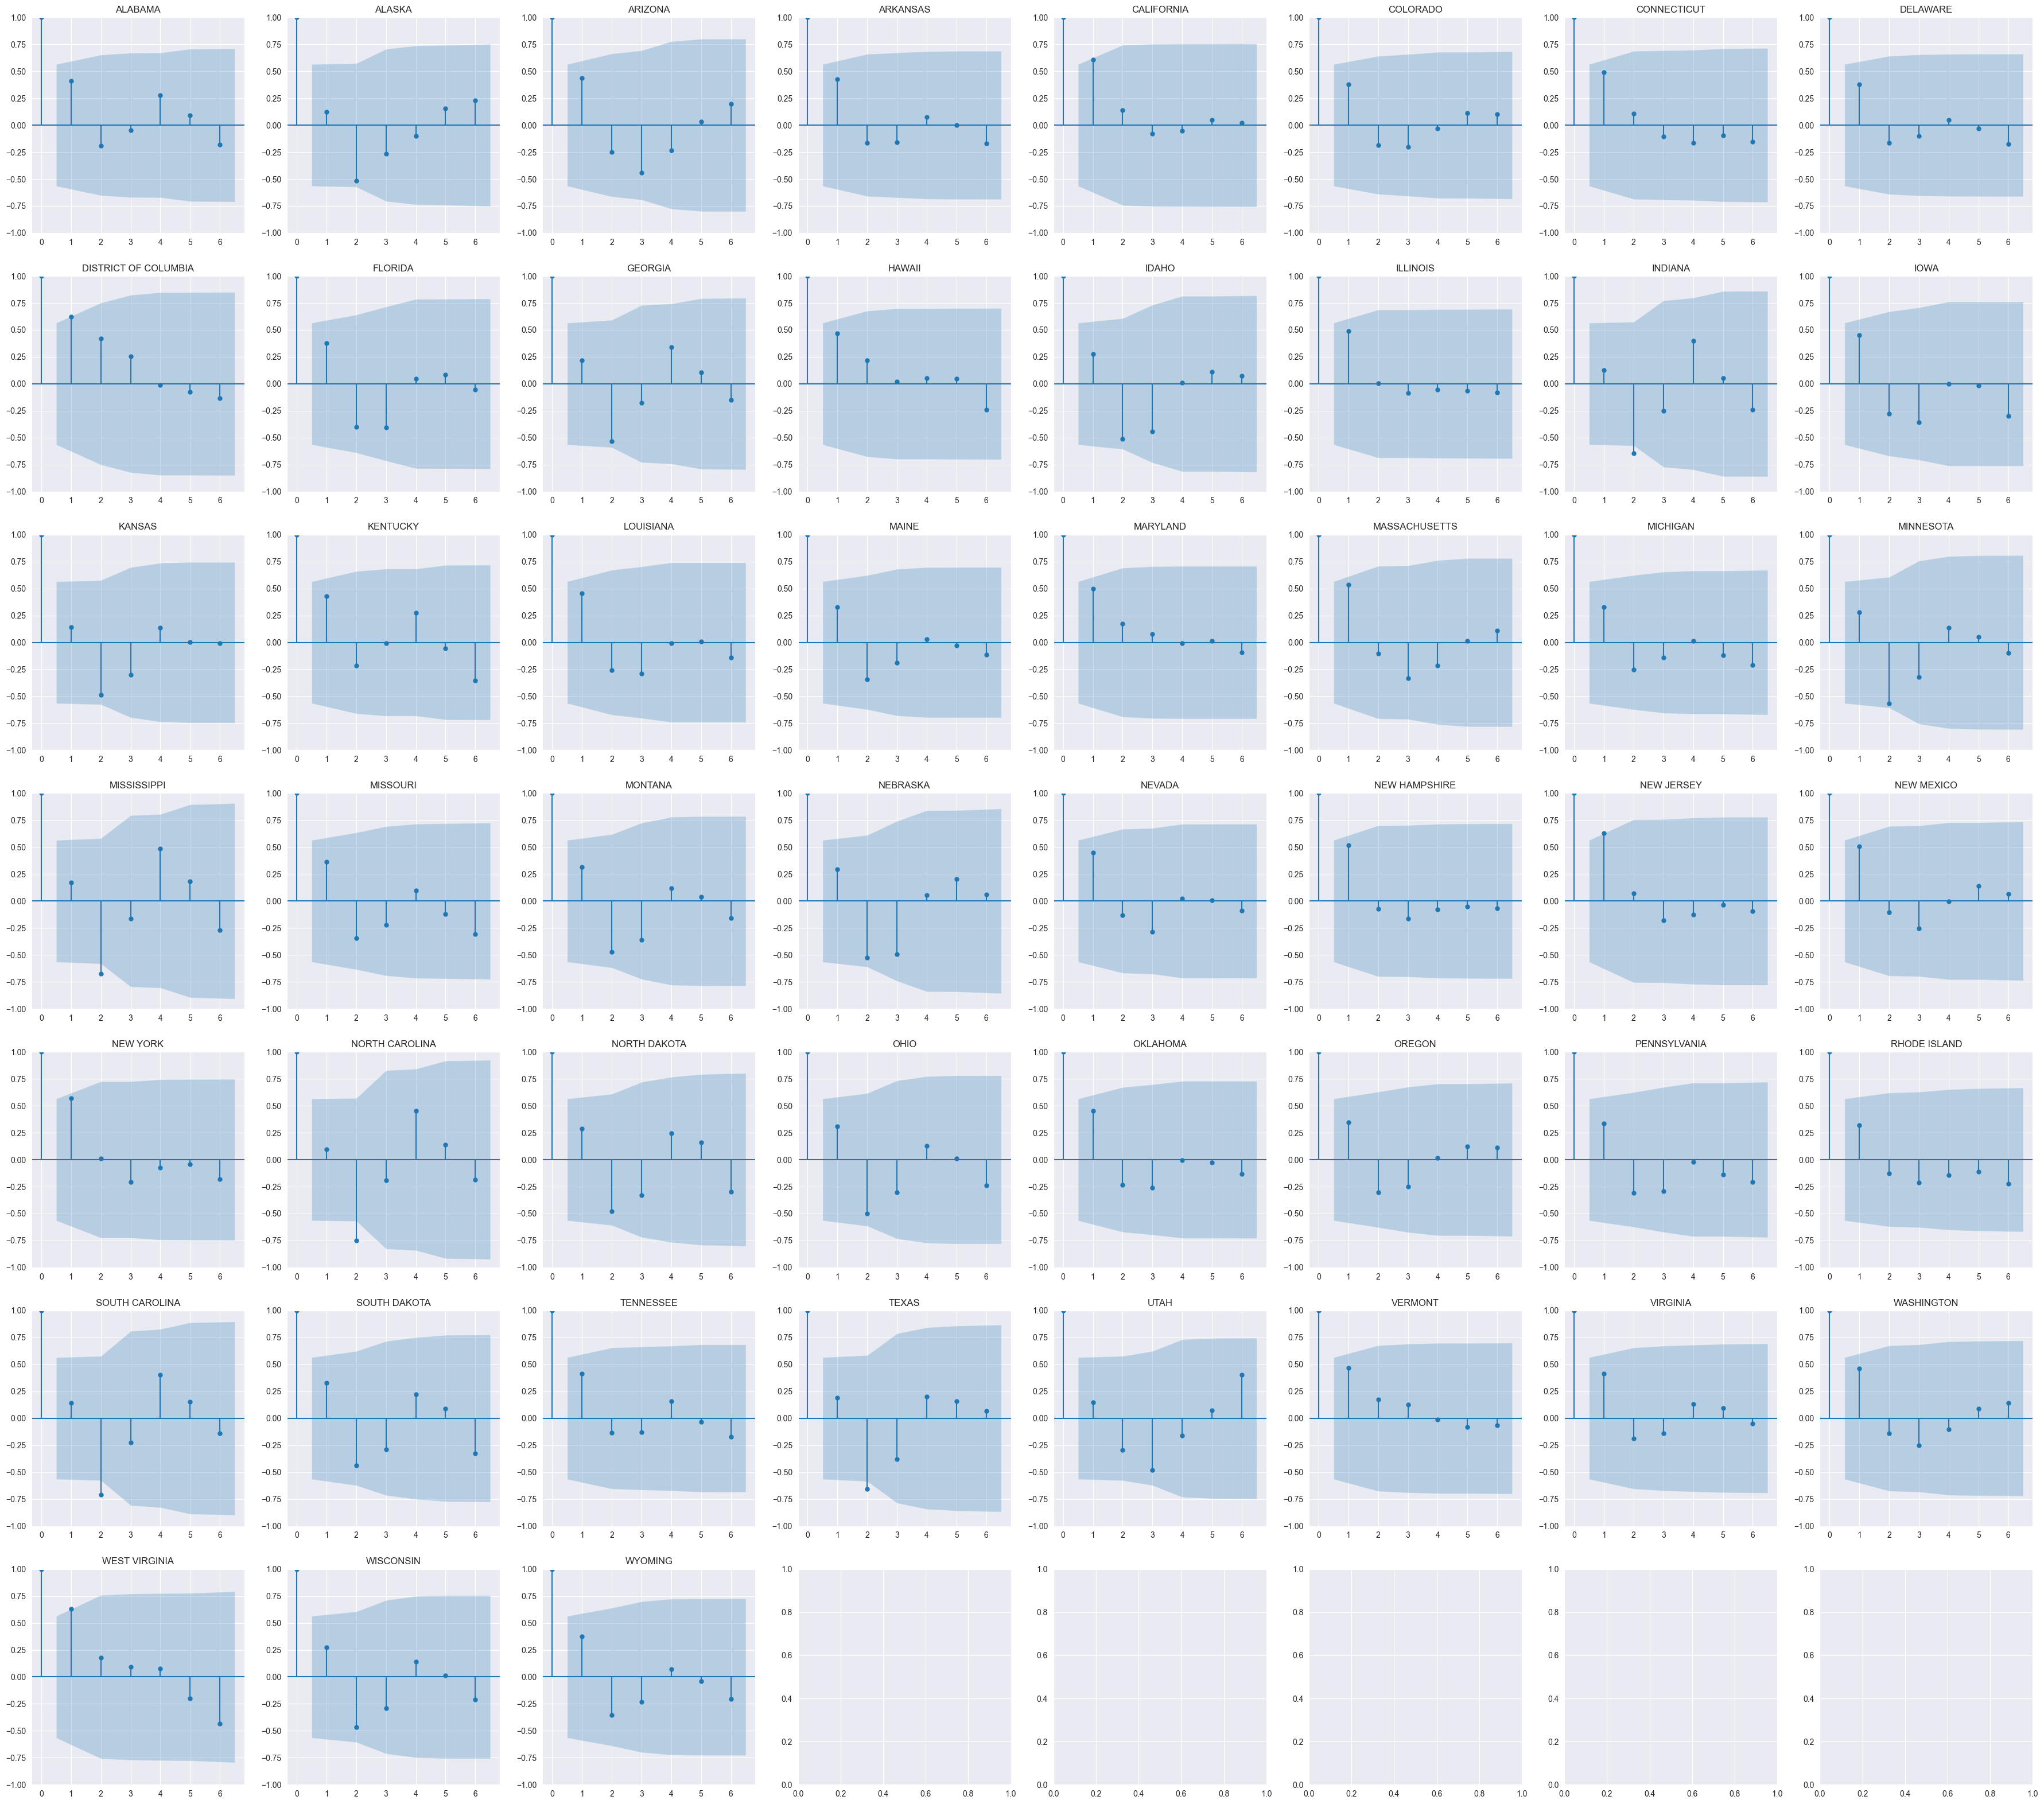

In [120]:
fig, ax = plt.subplots(7,8, figsize=(45,40))
ax = ax.flatten()
for i,st in enumerate(rep.partition_by('state')):
    plot_acf(st.select('percentage').to_series(), ax=ax[i])
    state = st.select('state').to_series().unique().to_list()[0]
    ax[i].set_title(state)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')   

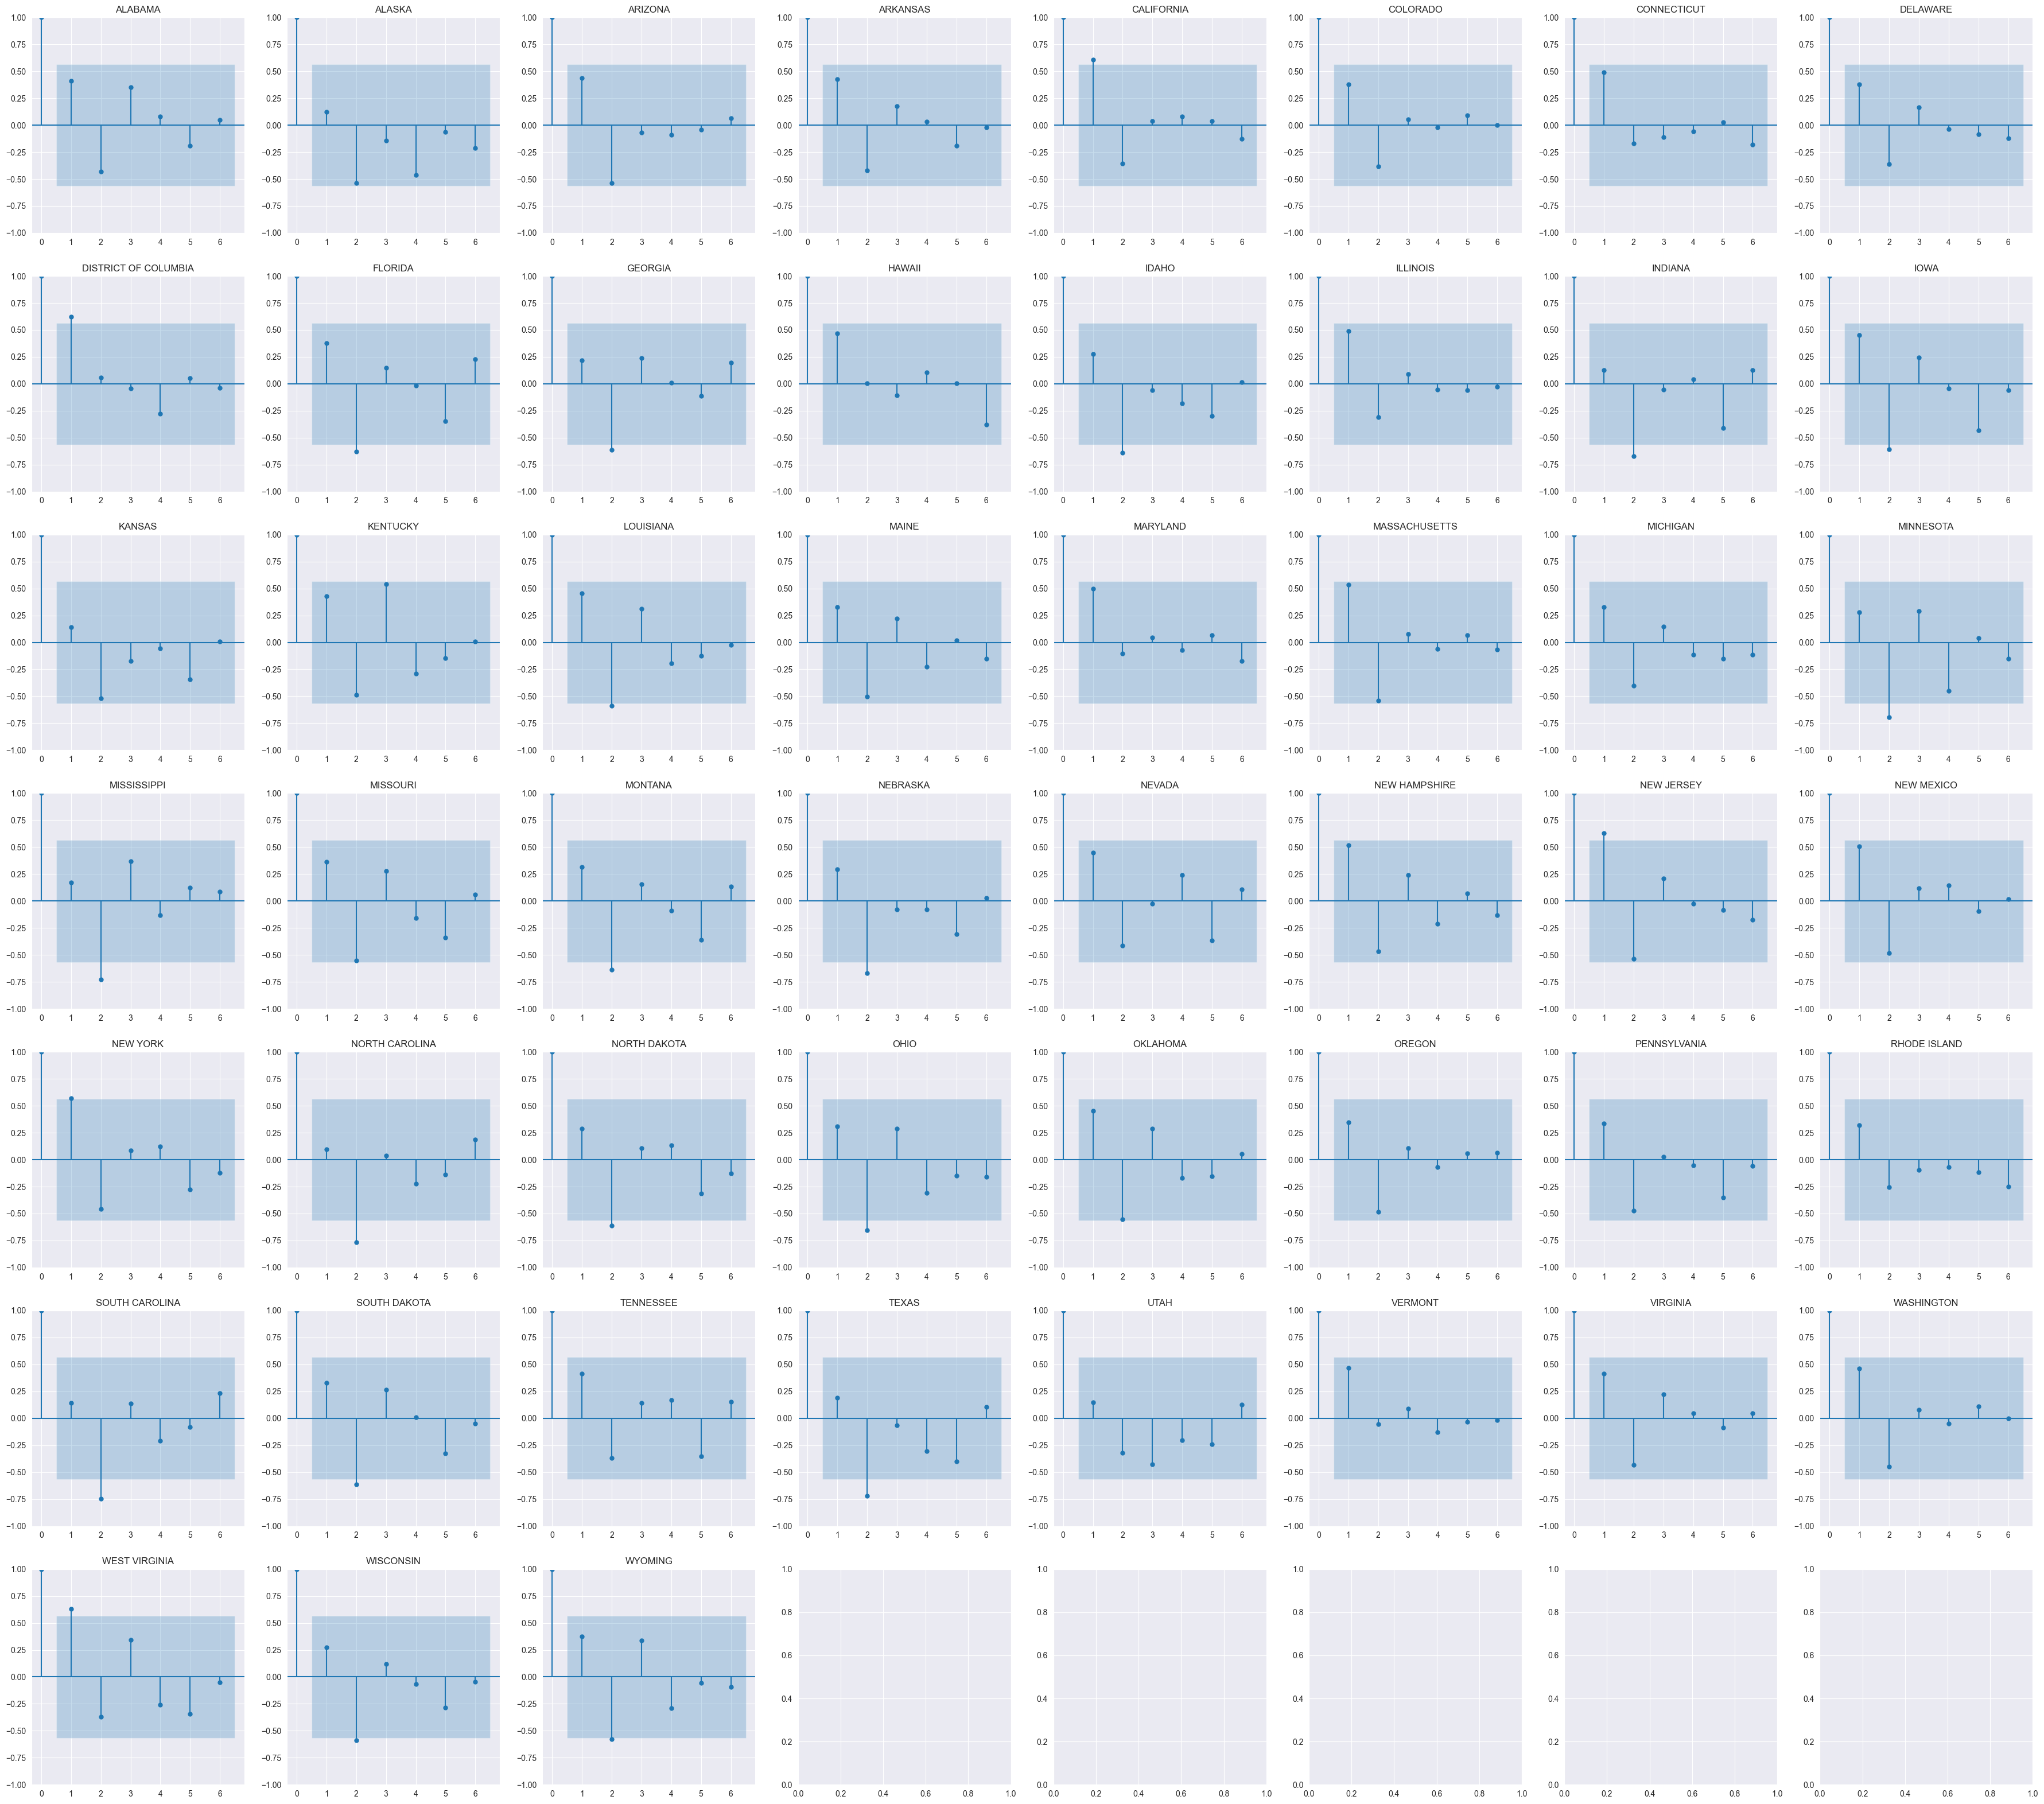

In [129]:
fig, ax = plt.subplots(7,8, figsize=(45,40))
ax = ax.flatten()
for i,st in enumerate(rep.partition_by('state')):
    plot_pacf(st.select('percentage').to_series(), ax=ax[i])
    state = st.select('state').to_series().unique().to_list()[0]
    ax[i].set_title(state)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')  

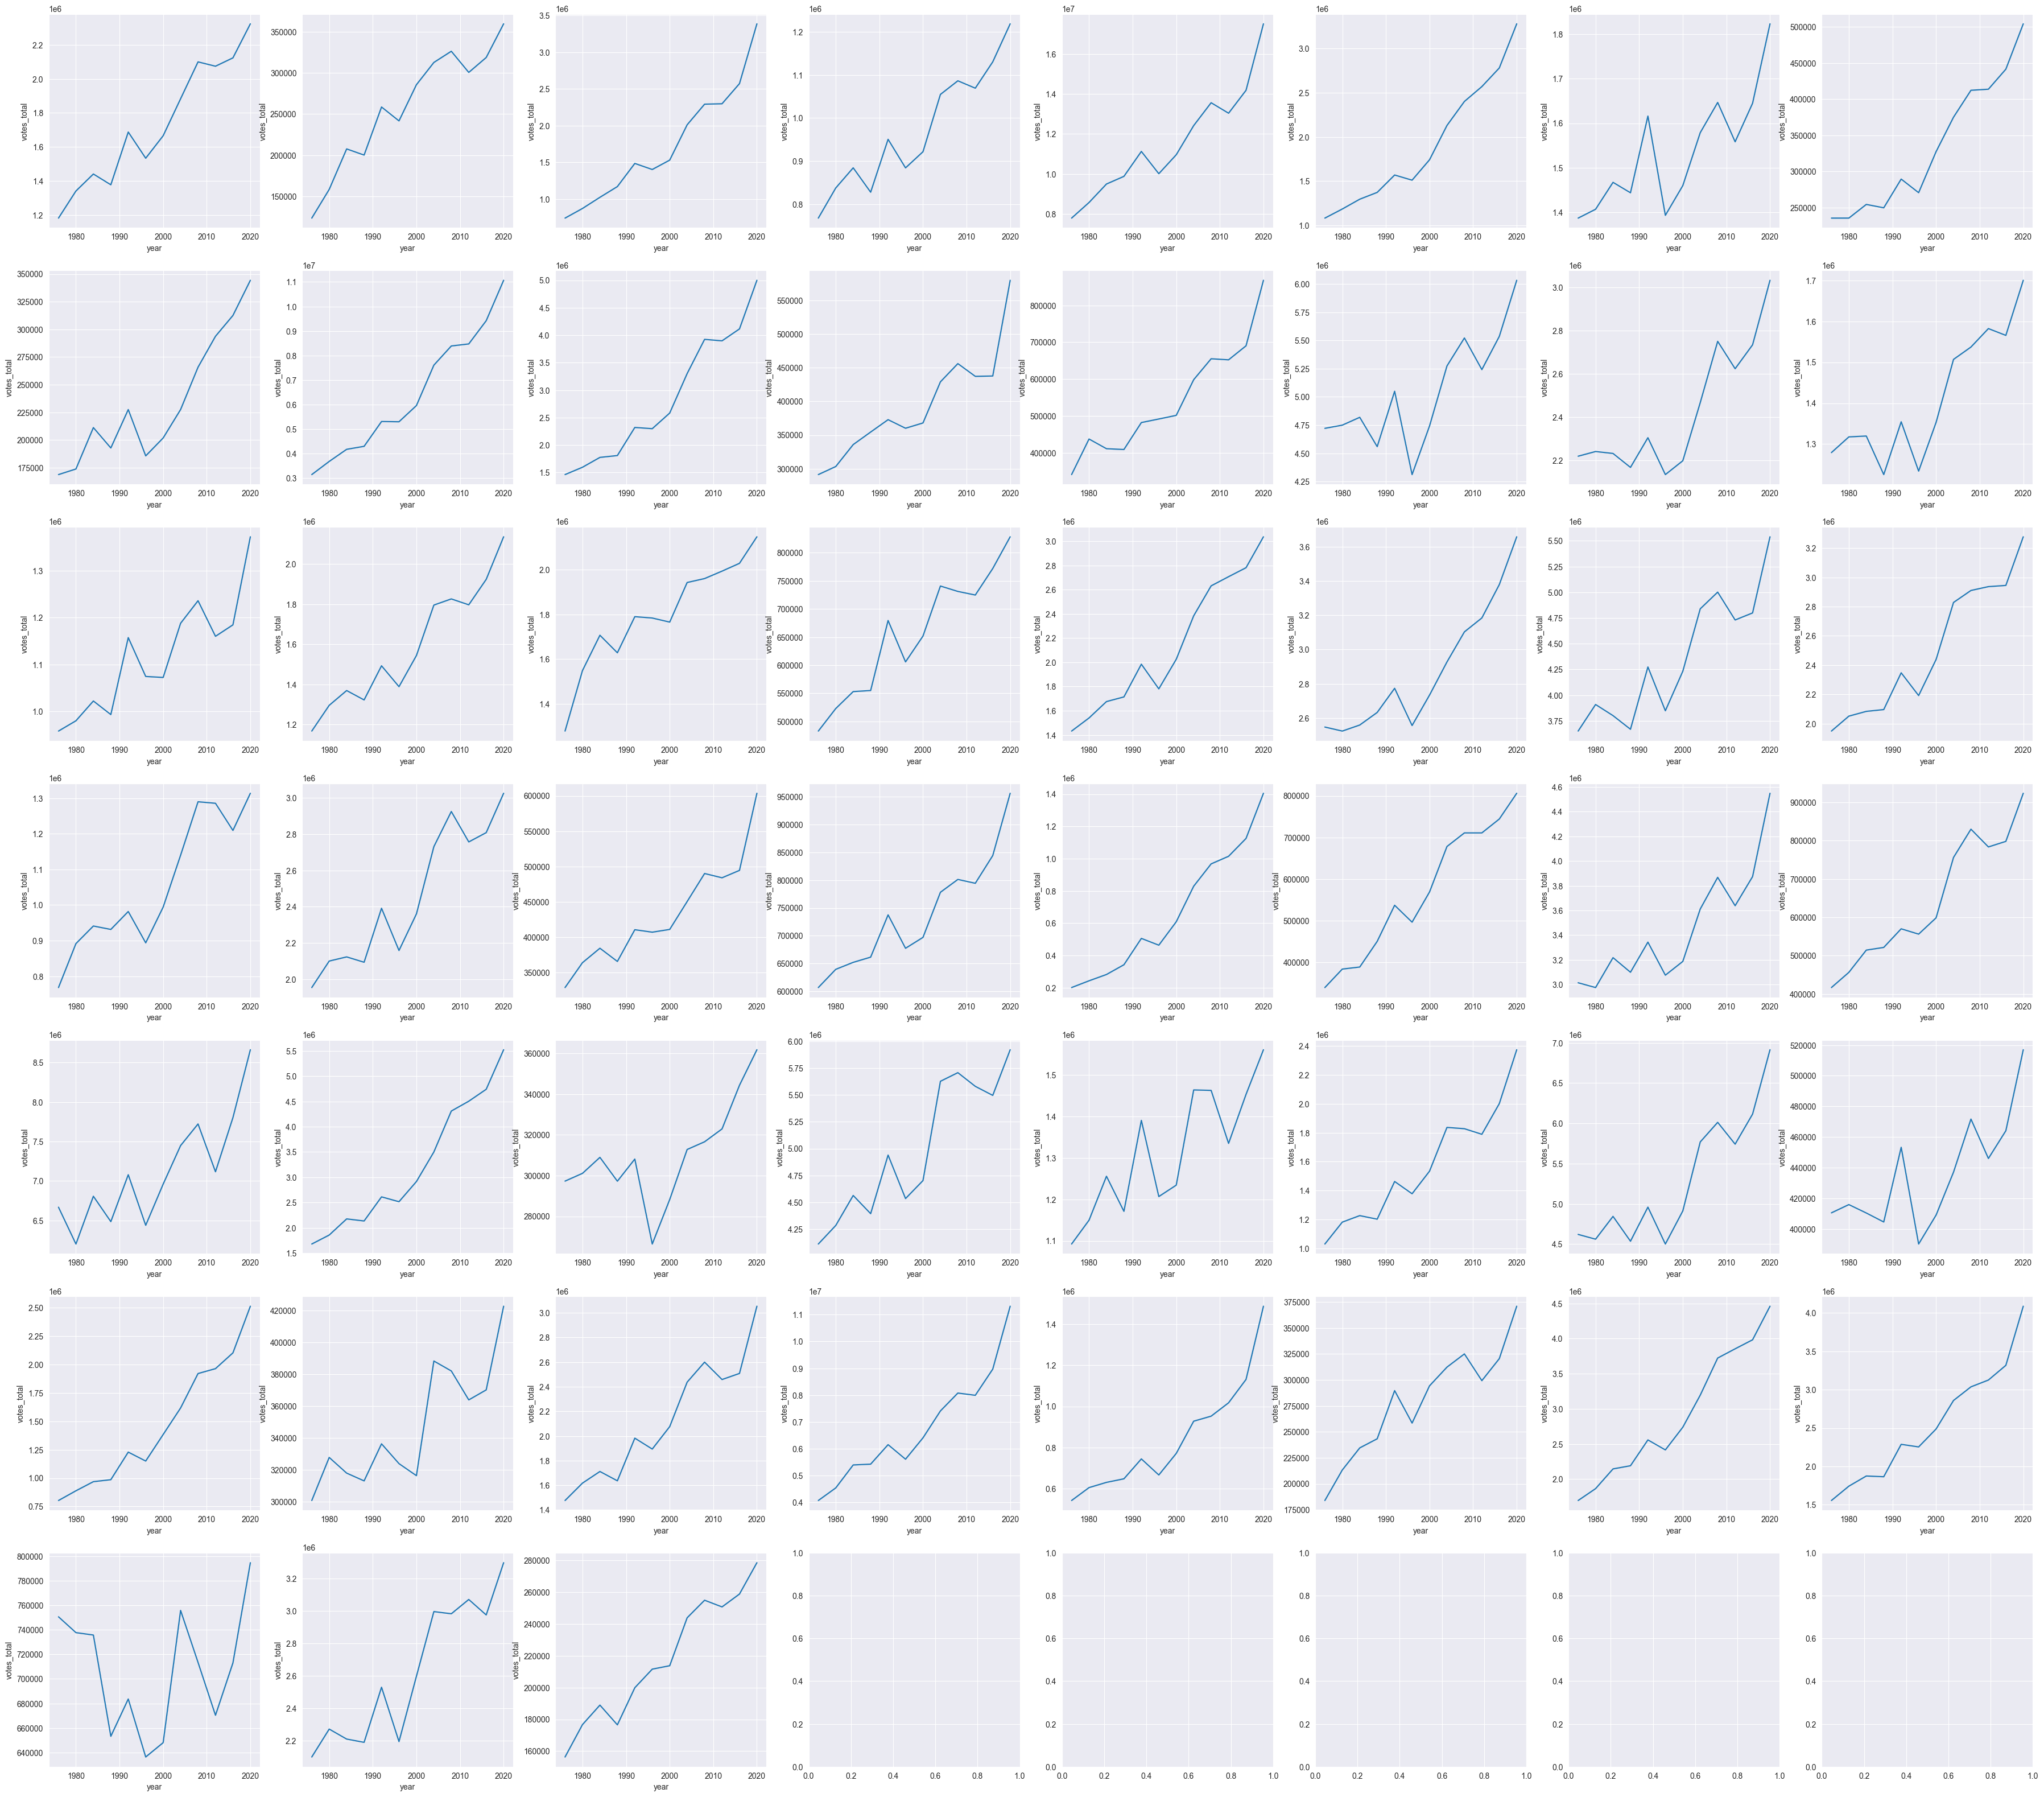

In [132]:
total_by_state = results.select(
    pl.col('year'),
    pl.col('state'),
    pl.col('votes_total')
).partition_by("state")

fig, ax = plt.subplots(7,8, figsize=(45,40))
ax = ax.flatten()
for i, st in enumerate(total_by_state):
    sns.lineplot(
        st,
        x='year',
        y='votes_total',
        ax=ax[i]
    )
